# Predicting global land temperature using ARIMA time series

ARIMA model is a forecasting model which can predict future data based on the past data. 
ARIMA consists of 3 parts - Auto Regressor, Integration & Moving Average. The model considers these three factors to come up with a prediction.

In [2]:
#Importing all the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
%matplotlib inline

In [3]:
#The dataset was downloaded from https://data.world/data-society/global-climate-change-data
#Reading the dataset into a dataframe while assigning the dt column as the index and letting pandas know that the column contains
#dates by using 'parse_dates=True'.
df = pd.read_csv('C:/Users/manre/Datasets/TemperaturesByMajorCity.csv',index_col=0,parse_dates=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
df.index[0:].year

Int64Index([1849, 1849, 1849, 1849, 1849, 1849, 1849, 1849, 1849, 1849,
            ...
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype=&#39;int64&#39;, name=&#39;dt&#39;, length=239177)

In [5]:
#Dropping the null values since null values can't be fed into a machine learning model.
df.dropna(inplace=True)
df.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [6]:
#Grouping the temperature yearly to obtain the average global land temperature.
df.groupby(df.index[0:].year)['AverageTemperature'].mean()

dt
1743     4.020077
1744    10.344192
1745     0.384885
1750     9.145748
1751     9.441240
          ...    
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.263006
Name: AverageTemperature, Length: 267, dtype: float64

In [7]:
#Moving the above grouped values to a new dataframe.
dftemp = pd.DataFrame(df.groupby(df.index[0:].year)['AverageTemperature'].mean())

&lt;matplotlib.axes._subplots.AxesSubplot at 0x1cf57931388&gt;

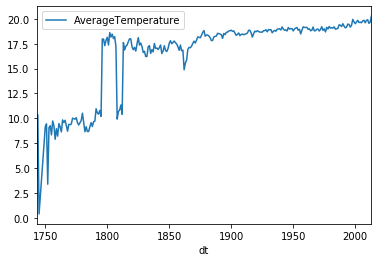

In [8]:
dftemp.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(dftemp['AverageTemperature'], autolag = 'AIC')
print("1. ADF :", dftest1[0])
print("2. P-value :", dftest1[1])
print("3. Number of lags :", dftest1[2])
print("4. No. of observations used for ADF regression and critical values calculation :", dftest1[3])
print("5. Critical values :", dftest1[4])
for key, val in dftest1[4].items():
    print("\t",key, ":", val)

1. ADF : -2.574113136162448
2. P-value : 0.09846645232231599
3. Number of lags : 12
4. No. of observations used for ADF regression and critical values calculation : 254
5. Critical values : {&#39;1%&#39;: -3.456360306409983, &#39;5%&#39;: -2.8729872043802356, &#39;10%&#39;: -2.572870232500465}
	 1% : -3.456360306409983
	 5% : -2.8729872043802356
	 10% : -2.572870232500465


The data has to be stationary inorder to implement time series prediction. From the above plot we might have a doubt about the stationarity of the data since the graph is moving upwards. Inorder to confirm this, we can run a statistical test which is the adfuller test. 
In the statistical test, following are the hypothesis,
                            Ho (null hypothesis) : The data is non-stationary
                            Ha (alternate hypothesis) : The data is stationary
The P-value above is 0.09 which is greater than 0.05. Therefore we cannot reject the null hypothesis & will have to understand that the data is non-stationary.
The ARIMA model that we are going to use below has the 'Integrated' part which is about differencing the data. Differencing is carried out to bring stationarity into the data.

In [10]:
from pmdarima import auto_arima

In [11]:
stepwise_fit = auto_arima(dftemp['AverageTemperature'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=837.995, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=924.659, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.442, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=865.801, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=923.191, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=860.512, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=846.442, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=839.942, Time=0.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=839.750, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=863.160, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=850.061, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=840.858, Time=0.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=835.934, Time=0.49 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=833.381, Time=0.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=831.8

&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  267
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -407.947
Date:                Thu, 01 Oct 2020   AIC                            829.894
Time:                        16:45:25   BIC                            854.978
Sample:                             0   HQIC                           839.971
                                - 267                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P&gt;|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0179      0.014      1.277      0.202      -0.010       0.045
ar.L1          0.4012      0.039     10.191      0.000       0.324       0.478
ar.L2          0.2325      0.047      4.917      0.000       0.140       0.325
ar.L3          0.4154      0.039     10.582      0.000       0.338       0.492
ar.L4         -0.4021      0.036    -11.310      0.000      -0.472      -0.332
ma.L1         -0.8960      0.050    -17.891      0.000      -0.994      -0.798
sigma2         1.2517      0.057     21.826      0.000       1.139       1.364
===================================================================================
Ljung-Box (Q):                       43.44   Jarque-Bera (JB):              4676.30
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
&quot;&quot;&quot;

Above, we have used auto_arima which analyses the data to come up with a best model. We got the best model to be (4,1,1), which will be passed on while creating the model.
Below, we can see the model creation, fitting and summary.

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
x_train = dftemp.iloc[:-20]
x_test = dftemp.iloc[-20:]
print(x_train.shape, x_test.shape)

(247, 1) (20, 1)


In [17]:
#Obtaining the prediction for the last 20 values
pred_test = model.predict(start = len(x_train), end = len(dftemp)-1, typ = 'levels')
print(pred_test)

dt
1994    19.211319
1995    19.415660
1996    19.600149
1997    19.545698
1998    19.420311
1999    19.675322
2000    19.916985
2001    19.933289
2002    19.607230
2003    19.781256
2004    19.883415
2005    19.847455
2006    19.659538
2007    19.859369
2008    19.900490
2009    19.907320
2010    19.900720
2011    19.877165
2012    19.925848
2013    19.822390
dtype: float64


In [18]:
#Calculating the Root mean squared error to evaluate the model.
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_error = sqrt(mean_squared_error(pred_test,x_test))
print(rms_error)

0.2705999634747726


In [19]:
x_test.mean()

AverageTemperature    19.675684
dtype: float64

It can be seen above that the mean of the test dataset is 19.68 while the root mean squared error of the model is only 0.27. Low RMSE value indicate a better fit.

In [14]:
model = ARIMA(dftemp,order=(4,1,1))
model = model.fit()
model.summary()

C:\Users\manre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  &#39; ignored when e.g. forecasting.&#39;, ValueWarning)
C:\Users\manre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  &#39; ignored when e.g. forecasting.&#39;, ValueWarning)


&lt;class &#39;statsmodels.iolib.summary.Summary&#39;&gt;
&quot;&quot;&quot;
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.AverageTemperature   No. Observations:                  266
Model:                   ARIMA(4, 1, 1)   Log Likelihood                -407.947
Method:                         css-mle   S.D. of innovations              1.119
Date:                  Thu, 01 Oct 2020   AIC                            829.894
Time:                          16:45:25   BIC                            854.978
Sample:                               1   HQIC                           839.971
                                                                                
==============================================================================================
                                 coef    std err          z      P&gt;|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0508      0.021      2.438      0.015       0.010       0.092
ar.L1.D.AverageTemperature     0.4012      0.069      5.828      0.000       0.266       0.536
ar.L2.D.AverageTemperature     0.2325      0.070      3.343      0.001       0.096       0.369
ar.L3.D.AverageTemperature     0.4154      0.078      5.310      0.000       0.262       0.569
ar.L4.D.AverageTemperature    -0.4021      0.070     -5.735      0.000      -0.539      -0.265
ma.L1.D.AverageTemperature    -0.8960      0.044    -20.399      0.000      -0.982      -0.810
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7436           -0.9341j            1.1939           -0.3570
AR.2           -0.7436           +0.9341j            1.1939            0.3570
AR.3            1.2602           -0.3958j            1.3209           -0.0484
AR.4            1.2602           +0.3958j            1.3209            0.0484
MA.1            1.1160           +0.0000j            1.1160            0.0000
-----------------------------------------------------------------------------
&quot;&quot;&quot;

In [15]:
pred = model.predict(start = len(dftemp), end = len(dftemp)+10, typ = 'levels')
# future_index = pd.date_range(start = '2014', end = '2023')
# pred.index = future_index
print(pred)

266    19.970445
267    20.204515
268    20.447534
269    20.256703
270    20.469447
271    20.535191
272    20.451972
273    20.616905
274    20.623421
275    20.621304
276    20.741873
dtype: float64
C:\Users\manre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\manre\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 1.0, &#39;Average global land temperature&#39;)

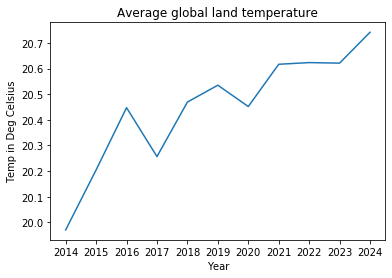

In [16]:
x = ['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
plt.plot(x, pred)
plt.xlabel('Year')
plt.ylabel('Temp in Deg Celsius')
plt.title('Average global land temperature')

We predicted the future values using model.predict as shown above. The final value in the dataset is for the year 2013 and we are predicting the values for the next 11 years ie, till 2024.
The plot showing the average global land temperature from 2014 to 2024 can be seen below. The plot shows an increasing pattern as expected due to global warming.